<a href="https://colab.research.google.com/github/Yenaaa/24spring_hss510/blob/main/NLP_tutorial_KSH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# I want to see what are the 5 most prominent topic groups in 175 articles on 'technology sovereignty' ... But abstracts alone are about 30,000 words.
# I want to select the ones that I could use for 'deep reading'.
# A priori knowledge of which words or topics are important in the corpus would help me greatly.

In [ ]:
# 1. Import libraries

import pandas as pd
from gensim.parsing.preprocessing import STOPWORDS
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
import nltk
from gensim.models.phrases import Phrases, Phraser
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# 2. Load the data

file_path = '/content/TS_iso_tutorial.xlsx'
df = pd.read_excel(file_path)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# 3. Download NLTK stopwords

nltk.download('stopwords')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# 4. Define stopwords

stop_words = set(stopwords.words('english'))  # Default NLTK stop words
custom_stop_words = ['we', 'to_the', 'or', 'only', ...]  # Custom stop words
stop_words.update(custom_stop_words)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# 5. Define preprocessing function

def preprocess(text):
    result = []
    for token in simple_preprocess(text):
        if token not in stop_words and len(token) > 3:
            result.append(token)
    return result

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# 6. Preprocess the abstracts
  #  removing stop words and filtering out short tokens.

processed_abstracts = [preprocess(abstract) for abstract in df['Abstract'] if pd.notnull(abstract)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# 7. Create bi-grams

bigrams_phrases = Phrases(processed_abstracts, min_count=1, threshold=1)
for phrase in ["technology_sovereignty", "data_sovereignty", 'digital_sovereignty', 'cloud_computing', 'european_union']: # Specify phrases
    bigrams_phrases.add_vocab([phrase.split()])
bigram = Phraser(bigrams_phrases)
bigram_abstracts = [bigram[abstract] for abstract in processed_abstracts]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# 8. Create dictionary and corpus

dictionary = Dictionary(bigram_abstracts)
dictionary.filter_extremes(no_below=5, no_above=0.5)  # Adjusted thresholds
corpus = [dictionary.doc2bow(abstract) for abstract in bigram_abstracts]

# dictionary: mapping of words to unique integer IDs, used to convert words into numerical IDs which are used in subsequent processing steps
# filter_extremes: filters out tokens that occur either too frequently or too infrequently in the corpus
# corpus: converts the text data into a bag-of-words format

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# 9. Train LDA model

lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, random_state=100, update_every=1, chunksize=100, passes=10, alpha='auto', per_word_topics=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# 10. Display topics

for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.030*"china" + 0.016*"techno_nationalism" + 0.013*"paper" + 0.012*"three" + 0.012*"process" + 0.011*"nationalism" + 0.011*"technological" + 0.009*"privacy" + 0.009*"study" + 0.009*"chinese"
Topic: 1 
Words: 0.019*"industry" + 0.017*"techno_nationalism" + 0.012*"interests" + 0.012*"study" + 0.012*"however" + 0.012*"china" + 0.011*"especially" + 0.011*"economic" + 0.010*"autonomy" + 0.009*"government"
Topic: 2 
Words: 0.020*"data" + 0.015*"digital_sovereignty" + 0.013*"article" + 0.013*"sovereignty" + 0.011*"policy" + 0.011*"data_localization" + 0.010*"internet" + 0.010*"also" + 0.009*"information" + 0.009*"measures"
Topic: 3 
Words: 0.016*"data" + 0.014*"sovereignty" + 0.012*"data_governance" + 0.011*"national" + 0.010*"research" + 0.009*"technology" + 0.009*"platforms" + 0.008*"digital" + 0.008*"german" + 0.008*"government"
Topic: 4 
Words: 0.015*"internet" + 0.015*"digital_sovereignty" + 0.015*"global" + 0.013*"policies" + 0.013*"digital" + 0.013*"state" + 0.012*"inn

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
stop_words = set(stopwords.words('english'))  # Default NLTK stop words
custom_stop_words = ['we', 'to_the', 'or', 'only', 'paper', 'process', 'study', 'however', 'especially', 'also', 'meausures', 'measure', 'research', 'three', 'article']  # Custom stop words
stop_words.update(custom_stop_words)

def preprocess(text):
    result = []
    for token in simple_preprocess(text):
        if token not in stop_words and len(token) > 3:
            result.append(token)
    return result

processed_abstracts = [preprocess(abstract) for abstract in df['Abstract'] if pd.notnull(abstract)]

bigrams_phrases = Phrases(processed_abstracts, min_count=1, threshold=1)
for phrase in ["technology_sovereignty", "data_sovereignty", 'digital_sovereignty', 'cloud_computing', 'european_union']: # Specify phrases
    bigrams_phrases.add_vocab([phrase.split()])
bigram = Phraser(bigrams_phrases)
bigram_abstracts = [bigram[abstract] for abstract in processed_abstracts]

dictionary = Dictionary(bigram_abstracts)
dictionary.filter_extremes(no_below=5, no_above=0.5)  # Adjusted thresholds
corpus = [dictionary.doc2bow(abstract) for abstract in bigram_abstracts]

lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, random_state=100, update_every=1, chunksize=100, passes=10, alpha='auto', per_word_topics=True)

for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic: 0 
Words: 0.024*"digital_sovereignty" + 0.018*"sovereignty" + 0.017*"cloud" + 0.012*"digital" + 0.012*"technologies" + 0.010*"projects" + 0.010*"technological" + 0.009*"industry" + 0.009*"discourses" + 0.008*"political"
Topic: 1 
Words: 0.034*"china" + 0.016*"techno_nationalism" + 0.012*"chinese" + 0.010*"economic" + 0.009*"policy" + 0.008*"industry" + 0.008*"united_states" + 0.008*"trade" + 0.007*"data_flows" + 0.007*"challenge"
Topic: 2 
Words: 0.015*"systems" + 0.013*"data" + 0.012*"development" + 0.010*"among" + 0.010*"digital_sovereignty" + 0.009*"india" + 0.009*"system" + 0.009*"technology" + 0.009*"social_media" + 0.009*"data_sovereignty"
Topic: 3 
Words: 0.025*"data" + 0.024*"internet" + 0.013*"data_localization" + 0.013*"state" + 0.011*"digital" + 0.011*"public" + 0.010*"sovereignty" + 0.009*"governments" + 0.009*"global" + 0.009*"actors"
Topic: 4 
Words: 0.032*"measures" + 0.025*"governance" + 0.025*"innovation" + 0.017*"personal_data" + 0.016*"global" + 0.015*"policie

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


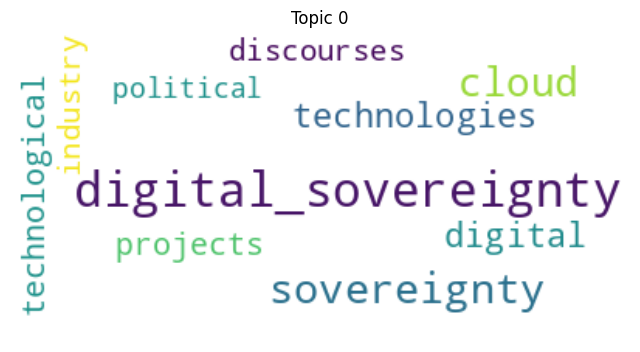

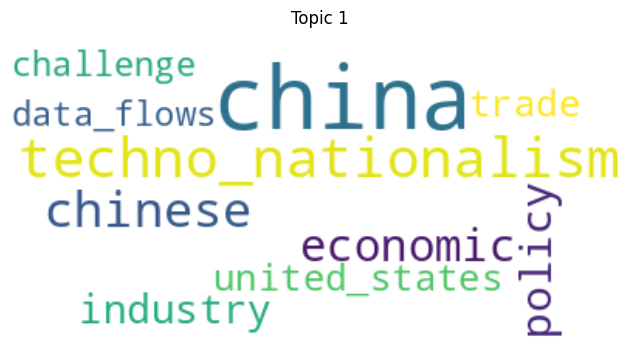

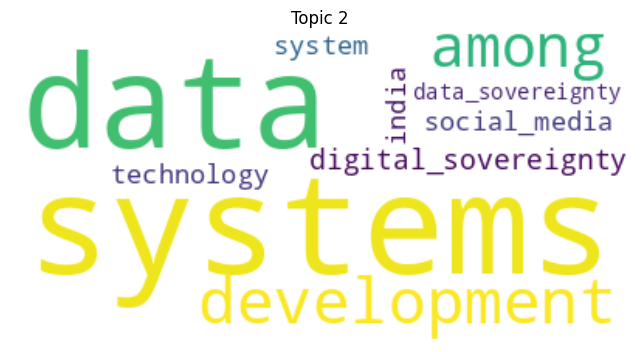

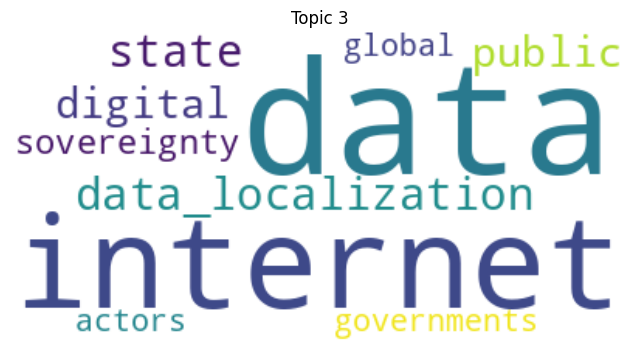

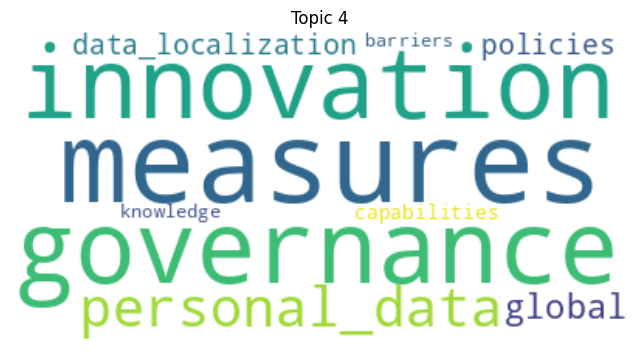

In [ ]:
# Visualize in a wordcloud for each topic

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define a function to generate word clouds for topics
def generate_word_cloud(topic_words, topic_idx):
    word_freq = {}
    for word_prob in topic_words.split(' + '):
        prob, word = word_prob.split('*')
        word = word.strip('"')
        word_freq[word] = float(prob)

    # Generate word cloud
    wordcloud = WordCloud(background_color='white').generate_from_frequencies(word_freq)
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Topic {}'.format(topic_idx))
    plt.axis('off')
    plt.show()

# Define the topic-word distributions
topics = [
    "0.024*\"digital_sovereignty\" + 0.018*\"sovereignty\" + 0.017*\"cloud\" + 0.012*\"digital\" + 0.012*\"technologies\" + 0.010*\"projects\" + 0.010*\"technological\" + 0.009*\"industry\" + 0.009*\"discourses\" + 0.008*\"political\"",
    "0.034*\"china\" + 0.016*\"techno_nationalism\" + 0.012*\"chinese\" + 0.010*\"economic\" + 0.009*\"policy\" + 0.008*\"industry\" + 0.008*\"united_states\" + 0.008*\"trade\" + 0.007*\"data_flows\" + 0.007*\"challenge\"",
    "0.015*\"systems\" + 0.013*\"data\" + 0.012*\"development\" + 0.010*\"among\" + 0.010*\"digital_sovereignty\" + 0.009*\"india\" + 0.009*\"system\" + 0.009*\"technology\" + 0.009*\"social_media\" + 0.009*\"data_sovereignty\"",
    "0.025*\"data\" + 0.024*\"internet\" + 0.013*\"data_localization\" + 0.013*\"state\" + 0.011*\"digital\" + 0.011*\"public\" + 0.010*\"sovereignty\" + 0.009*\"governments\" + 0.009*\"global\" + 0.009*\"actors\"",
    "0.032*\"measures\" + 0.025*\"governance\" + 0.025*\"innovation\" + 0.017*\"personal_data\" + 0.016*\"global\" + 0.015*\"policies\" + 0.015*\"data_localization\" + 0.013*\"capabilities\" + 0.012*\"barriers\" + 0.011*\"knowledge\""
]

# Generate word clouds for each topic
for idx, topic in enumerate(topics):
    generate_word_cloud(topic, idx)


In [ ]:
# visualize using pyLDAavis

!pip install pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Visualize the LDA model
vis_data = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis_data)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from gensim.models import CoherenceModel

# Compute coherence scores for different numbers of topics
coherence_scores = []
for num_topics in range(2, 11):
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=100, update_every=1, chunksize=100, passes=10, alpha='auto', per_word_topics=True)
    coherence_model = CoherenceModel(model=lda_model, texts=bigram_abstracts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append((num_topics, coherence_score))

# Select the optimal number of topics based on coherence score
optimal_num_topics = max(coherence_scores, key=lambda x: x[1])[0]
optimal_coherence_score = max(coherence_scores, key=lambda x: x[1])[1]

print("Optimal Number of Topics:", optimal_num_topics)
print("Coherence Score:", optimal_coherence_score)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Optimal Number of Topics: 9
Coherence Score: 0.28948467851227183


In [ ]:
stop_words = set(stopwords.words('english'))  # Default NLTK stop words
custom_stop_words = ['we', 'to_the', 'or', 'only', 'paper', 'process', 'study', 'however', 'especially', 'also', 'meausures', 'measure', 'research', 'three', 'article']  # Custom stop words
stop_words.update(custom_stop_words)

def preprocess(text):
    result = []
    for token in simple_preprocess(text):
        if token not in stop_words and len(token) > 3:
            result.append(token)
    return result

processed_abstracts = [preprocess(abstract) for abstract in df['Abstract'] if pd.notnull(abstract)]

bigrams_phrases = Phrases(processed_abstracts, min_count=1, threshold=1)
for phrase in ["technology_sovereignty", "data_sovereignty", 'digital_sovereignty', 'cloud_computing', 'european_union']: # Specify phrases
    bigrams_phrases.add_vocab([phrase.split()])
bigram = Phraser(bigrams_phrases)
bigram_abstracts = [bigram[abstract] for abstract in processed_abstracts]

dictionary = Dictionary(bigram_abstracts)
dictionary.filter_extremes(no_below=5, no_above=0.5)  # Adjusted thresholds
corpus = [dictionary.doc2bow(abstract) for abstract in bigram_abstracts]

lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=9, random_state=100, update_every=1, chunksize=100, passes=10, alpha='auto', per_word_topics=True)

for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic: 0 
Words: 0.035*"digital_sovereignty" + 0.025*"sovereignty" + 0.021*"technologies" + 0.016*"digital" + 0.015*"domestic" + 0.013*"projects" + 0.013*"interests" + 0.012*"political" + 0.011*"international" + 0.010*"become"
Topic: 1 
Words: 0.032*"china" + 0.019*"policy" + 0.014*"chinese" + 0.013*"industry" + 0.012*"challenge" + 0.011*"digital" + 0.011*"united_states" + 0.010*"well" + 0.010*"trade" + 0.009*"data_flows"
Topic: 2 
Words: 0.014*"model" + 0.014*"systems" + 0.012*"development" + 0.011*"based" + 0.011*"issues" + 0.011*"data" + 0.011*"different" + 0.010*"information" + 0.009*"social_media" + 0.009*"national"
Topic: 3 
Words: 0.029*"internet" + 0.016*"data" + 0.015*"case" + 0.015*"state" + 0.014*"sovereignty" + 0.013*"practices" + 0.013*"digital" + 0.011*"control" + 0.010*"national" + 0.010*"government"
Topic: 4 
Words: 0.056*"data_localization" + 0.036*"measures" + 0.026*"global" + 0.021*"innovation" + 0.020*"policies" + 0.020*"localization" + 0.020*"governance" + 0.019*"p